In [3]:
import pandas as pd

In [2]:
url = "https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000"

In [4]:
table = pd.read_html(url, encoding = 'utf-8')
len(table)

2

In [5]:
table[0]

,구분,1회차 접종,2회차 접종
0,당일 누적A + B,29458016,16283360
1,당일 실적A,177818,533164
2,전일 누적B,29280198,15750196


In [6]:
table[1]

구분  1회차 접종            2회차 접종          
    구분   당일 실적     당일 누계   당일 실적     당일 누계
0   합계  177818  29458016  533164  16283360
1   서울   34235   5450266   94420   3054297
2   부산    9053   1983639   33604   1121817
3   대구    7221   1337832   26872    693819
4   인천   12734   1616927   29563    847192
5   광주    4960    816542   12921    449725
6   대전    6134    804767   14891    433086
7   울산    4150    634958   13402    315800
8   세종     923    171283    3509     88363
9   경기   46826   7249589  130584   3859905
10  강원    5202    953031   18825    567519
11  충북    5857    953377   16437    539453
12  충남    7331   1272097   24049    727773
13  전북    5660   1115357   17713    677759
14  전남    5593   1204482   19167    747253
15  경북    8513   1586167   34661    904585
16  경남   11492   1926263   35871   1047401
17  제주    1934    381439    6675    207613

In [ ]:
# 윗부분은 송광섭님이 하신 부분, 혹시나 아래에 제가 해놓은거 참고 하실거 있음 하세요. 저도 워낙 초짜라...

In [1]:
url2 = "https://ncv.kdca.go.kr/organStatus.es?mid=a11711000000"

In [4]:
table = pd.read_html(url2, encoding = 'utf-8')
len(table)

1

In [5]:
table[0]

구분  1회차 접종              접종완료          
                    구분   당일 접종     당일 누계   당일 실적     당일 누계
0                   합계  177818  29458016  533164  16283360
1          서울특별시강남구보건소    1891    285976    5094    163555
2          서울특별시강동구보건소    1676    258219    5505    143925
3          서울특별시강북구보건소     921    179060    2796    103093
4          서울특별시강서구보건소    1844    320366    5778    184156
..                 ...     ...       ...     ...       ...
254   제주특별자치도서귀포시동부보건소      98     28476     517     16453
255  제주특별자치도서귀포시서귀포보건소     264     59186     931     34467
256   제주특별자치도서귀포시서부보건소      98     19433     472     10534
257       제주특별자치도서부보건소     185     36168     742     20216
258       제주특별자치도제주보건소    1164    214559    3582    112737

[259 rows x 5 columns]

In [6]:
table1 = table[0]

In [25]:
table1[1:26].head()

구분 1회차 접종          접종완료        
            구분  당일 접종   당일 누계 당일 실적   당일 누계
1  서울특별시강남구보건소   1891  285976  5094  163555
2  서울특별시강동구보건소   1676  258219  5505  143925
3  서울특별시강북구보건소    921  179060  2796  103093
4  서울특별시강서구보건소   1844  320366  5778  184156
5  서울특별시관악구보건소   1504  257214  3560  146272

In [62]:
a = table1['구분'][1:26]
a.replace('보건소','').head()

,구분
1,서울특별시강남구보건소
2,서울특별시강동구보건소
3,서울특별시강북구보건소
4,서울특별시강서구보건소
5,서울특별시관악구보건소


In [88]:
b = a.set_index('구분')
b.tail()

""
구분
서울특별시용산구보건소
서울특별시은평구보건소
서울특별시종로구보건소
서울특별시중구보건소
서울특별시중랑구보건소


In [8]:
first = table1['1회차 접종'][1:26]
first.head()

,당일 접종,당일 누계
1,1891,285976
2,1676,258219
3,921,179060
4,1844,320366
5,1504,257214


In [9]:
first.columns

Index(['당일 접종', '당일 누계'], dtype='object')

In [10]:
first.columns = ['1회차 당일 접종', '1회차 당일 누계']
    # 열 이름 바꾸는 명령어: df.rename(columns={'Before':'After'}) , df.columns = ['col', 'col', 'col']
first.head()

,1회차 당일 접종,1회차 당일 누계
1,1891,285976
2,1676,258219
3,921,179060
4,1844,320366
5,1504,257214


In [11]:
day_total = sum(first['1회차 당일 접종'])
day_total

34235

In [12]:
day_sum = sum(first['1회차 당일 누계'])
day_sum

5450266

In [13]:
day_total_avg = day_total/25
day_total_avg

1369.4

In [14]:
day_sum_avg = day_sum/25
day_sum_avg

218010.64

In [15]:
new_row = pd.Series([day_total, day_sum], index = first.columns, name='합계')
first.append(new_row).head()

,1회차 당일 접종,1회차 당일 누계
1,1891,285976
2,1676,258219
3,921,179060
4,1844,320366
5,1504,257214


In [16]:
finish = table1['접종완료'][1:26]
finish.head()

,당일 실적,당일 누계
1,5094,163555
2,5505,143925
3,2796,103093
4,5778,184156
5,3560,146272


In [34]:
finish.columns = ['접종완료 당일 실적', '접종완료 당일 누계']
    # 열 이름 바꾸는 명령어: df.rename(columns={'Before':'After'}) , df.columns = ['col', 'col', 'col']
finish.tail()

,접종완료 당일 실적,접종완료 당일 누계
21,1942,69752
22,3811,154314
23,1403,69333
24,1450,50264
25,3655,126960


In [18]:
finish_total = sum(finish['접종완료 당일 실적'])
finish_total

94420

In [19]:
finish_sum = sum(finish['접종완료 당일 누계'])
finish_sum

3054297

In [20]:
finish_total_avg = finish_total/25
finish_total_avg

3776.8

In [21]:
finish_sum_avg = finish_sum/25
finish_sum_avg

122171.88

In [112]:
new_table = pd.concat([a, first, finish], axis=1)
new_table.head()

,구분,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
1,서울특별시강남구보건소,1891,285976,5094,163555
2,서울특별시강동구보건소,1676,258219,5505,143925
3,서울특별시강북구보건소,921,179060,2796,103093
4,서울특별시강서구보건소,1844,320366,5778,184156
5,서울특별시관악구보건소,1504,257214,3560,146272


In [113]:
new_table.columns

Index(['구분', '1회차 당일 접종', '1회차 당일 누계', '접종완료 당일 실적', '접종완료 당일 누계'], dtype='object')

In [116]:
c = new_table.set_index('구분')
c.tail()

,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
구분,,,,
서울특별시용산구보건소,836,123632,1942,69752
서울특별시은평구보건소,1361,270593,3811,154314
서울특별시종로구보건소,685,114927,1403,69333
서울특별시중구보건소,474,84201,1450,50264
서울특별시중랑구보건소,1364,226033,3655,126960


In [64]:
new_sum = pd.Series(['합계', day_total, day_sum, finish_total, finish_sum], index = new_table.columns, name = '합계')
table_m = new_table.append(new_sum)
table_m.tail()

,구분,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
22,서울특별시은평구보건소,1361,270593,3811,154314
23,서울특별시종로구보건소,685,114927,1403,69333
24,서울특별시중구보건소,474,84201,1450,50264
25,서울특별시중랑구보건소,1364,226033,3655,126960
합계,합계,34235,5450266,94420,3054297


In [66]:
new_avg = pd.Series(['평균', day_total_avg, day_sum_avg, finish_total_avg, finish_sum_avg], index = table_m.columns, name='평균')
table_f = table_m.append(new_avg)
table_f.tail()

,구분,1회차 당일 접종,1회차 당일 누계,접종완료 당일 실적,접종완료 당일 누계
23,서울특별시종로구보건소,685.0,114927.00,1403.0,69333.00
24,서울특별시중구보건소,474.0,84201.00,1450.0,50264.00
25,서울특별시중랑구보건소,1364.0,226033.00,3655.0,126960.00
합계,합계,34235.0,5450266.00,94420.0,3054297.00
평균,평균,1369.4,218010.64,3776.8,122171.88


In [67]:
table_f.to_csv('table.csv',mode="w",encoding='euc-kr')

In [127]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

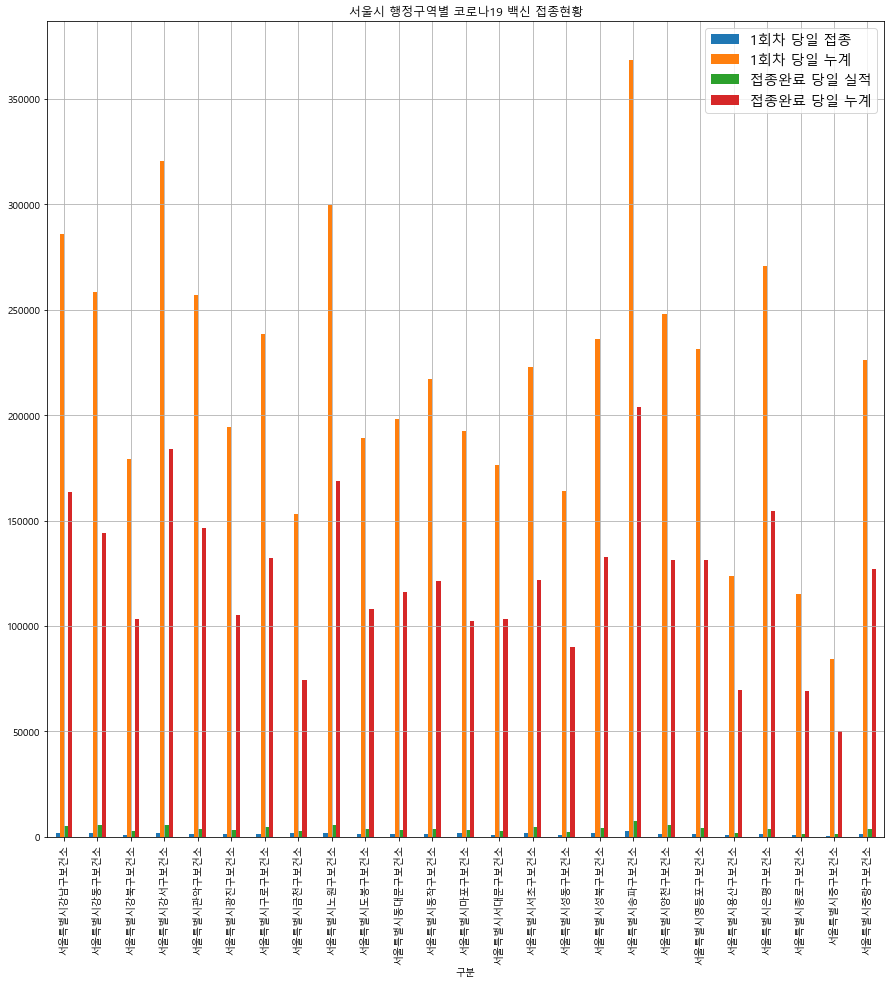

In [117]:
import matplotlib.pyplot as plt
c.plot(kind = 'bar', grid = True, figsize = (15,15))
plt.title('서울시 행정구역별 코로나19 백신 접종현황')

plt.legend(loc='best', ncol=1, fontsize=14)
plt.show()